# Problem Statement
The goal of this project is to classify movies as either "Drama" or "Non-Drama" based on metadata, such as IMDb ratings, number of votes, release year, and country availability. This binary classification problem helps in understanding patterns in the movie dataset and evaluating the effectiveness of machine learning models for predictive analysis.

We will use two machine learning models:
1. **Decision Tree Classifier**: A non-linear model that identifies patterns using hierarchical decisions.
2. **Logistic Regression**: A linear model that predicts probabilities for binary classification.

The dataset contains features like:
- **IMDb ratings**: Average user ratings.
- **Number of votes**: Count of users rating the movie.
- **Release year**: The year the movie was released.
- **Available countries**: Count of countries where the movie is available.

### Objectives
1. Preprocess the data to handle missing values and engineer useful features.
2. Train and evaluate both Decision Tree and Logistic Regression models.
3. Compare the performance using metrics like accuracy, precision, recall, F1-score, ROC-AUC, and PR-AUC.
4. Analyze the importance of features contributing to the classification.


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('/kaggle/input/full-apple-tv-dataset/data.csv')

# Display overview
print("Dataset Overview: \n")
print(data.head(), "\n\n")
print("Dataset Info: \n")
print(data.info(), "\n\n")
print("Summary Statistics: \n")
print(data.describe(), "\n\n")

Dataset Overview: 

             title   type          genres  releaseYear     imdbId  \
0       Four Rooms  movie          Comedy       1995.0  tt0113101   
1     Forrest Gump  movie  Drama, Romance       1994.0  tt0109830   
2  American Beauty  movie           Drama       1999.0  tt0169547   
3     Citizen Kane  movie  Drama, Mystery       1941.0  tt0033467   
4       Metropolis  movie   Drama, Sci-Fi       1927.0  tt0017136   

   imdbAverageRating  imdbNumVotes          availableCountries  
0                6.7      113169.0                          DE  
1                8.8     2340761.0                  AU, CA, US  
2                8.3     1236363.0  AT, CH, DE, FR, GB, IE, IT  
3                8.3      476537.0                      DE, GB  
4                8.3      191859.0                          GB   


Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18047 entries, 0 to 18046
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  

In [3]:
# Fill missing values
data['genres'] = data['genres'].fillna('')  # Empty string for genres
data['releaseYear'] = data['releaseYear'].fillna(data['releaseYear'].median())
data['imdbAverageRating'] = data['imdbAverageRating'].fillna(data['imdbAverageRating'].median())
data['imdbNumVotes'] = data['imdbNumVotes'].fillna(data['imdbNumVotes'].median())
data['availableCountries'] = data['availableCountries'].fillna('')

# Feature engineering
data['is_drama'] = data['genres'].apply(lambda x: 1 if 'Drama' in x else 0)
data['country_count'] = data['availableCountries'].apply(lambda x: len(x.split(',')))

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['releaseYear', 'imdbAverageRating', 'imdbNumVotes', 'country_count']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


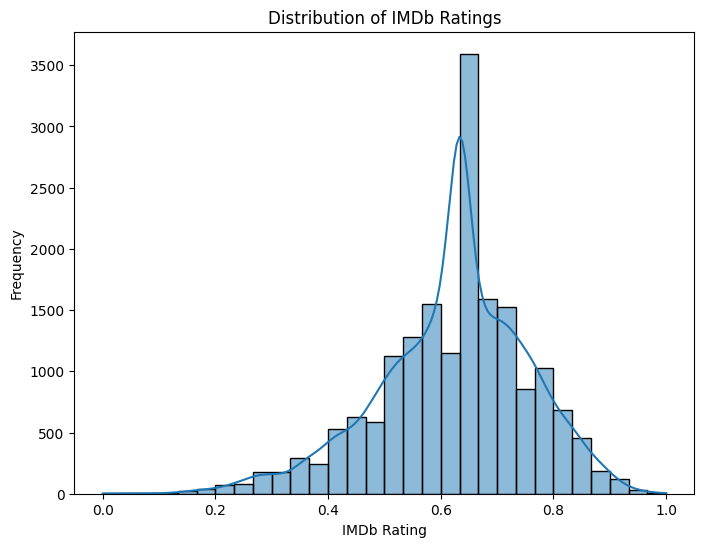

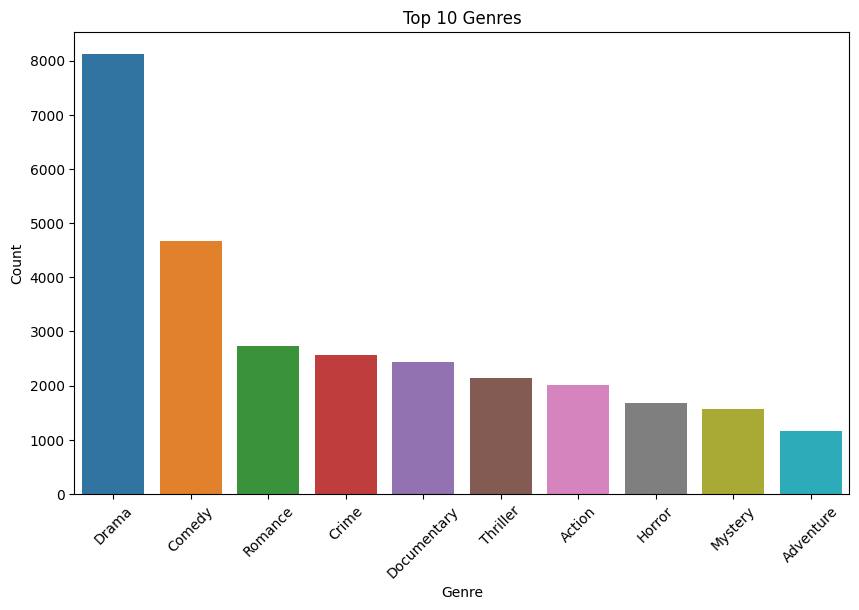

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of IMDb ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['imdbAverageRating'], bins=30, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 genres
from collections import Counter
all_genres = [genre for sublist in data['genres'].apply(lambda x: x.split(', ')) for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres])
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Features and target
features = ['releaseYear', 'imdbAverageRating', 'imdbNumVotes', 'country_count']
target = 'is_drama'
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Decision Tree
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [7]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, confusion_matrix
)

# Function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    predictions = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, proba)
    logloss = log_loss(y_test, proba)
    conf_matrix = confusion_matrix(y_test, predictions)

    print(f"--- {name} Evaluation --- \n")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print(f"Log Loss: {logloss:.2f}")
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Log Loss": logloss,
    }

# Evaluate Decision Tree
dt_results = evaluate_model("Decision Tree", dt_model, X_test, y_test)

# Evaluate Logistic Regression
lr_results = evaluate_model("Logistic Regression", lr_model, X_test, y_test)



--- Decision Tree Evaluation --- 

Accuracy: 0.68
Precision: 0.68
Recall: 0.60
F1-Score: 0.64
ROC-AUC: 0.73
Log Loss: 0.60
--- Logistic Regression Evaluation --- 

Accuracy: 0.58
Precision: 0.60
Recall: 0.27
F1-Score: 0.37
ROC-AUC: 0.60
Log Loss: 0.68


Evaluation Metrics Comparison: 

      Metric  Decision Tree  Logistic Regression
0   Accuracy       0.684765             0.578947
1  Precision       0.679703             0.600000
2     Recall       0.603232             0.271095
3   F1-Score       0.639188             0.373454
4    ROC-AUC       0.733173             0.596775
5   Log Loss       0.599640             0.676127 



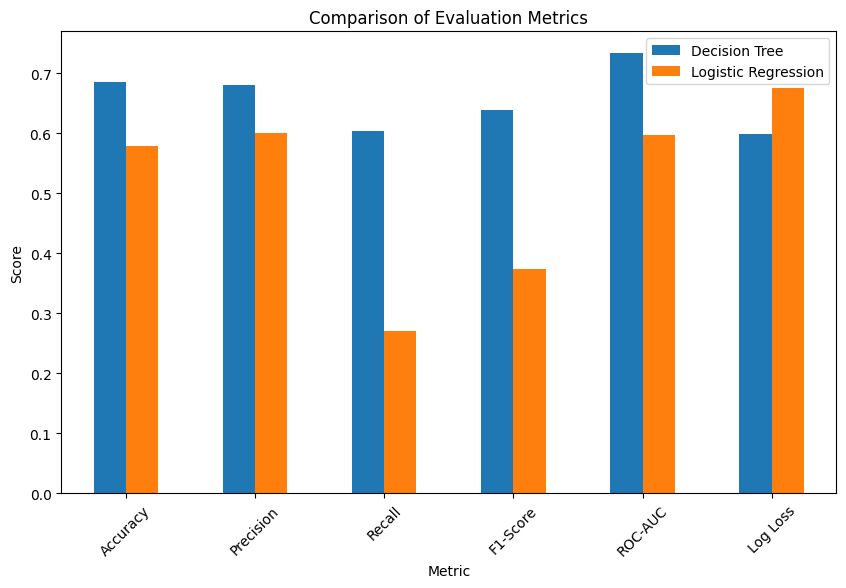

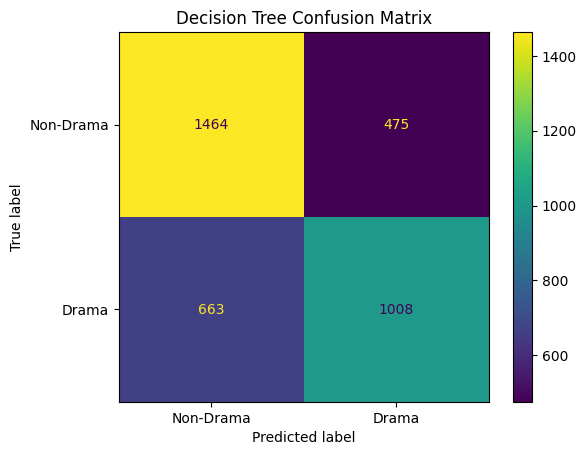

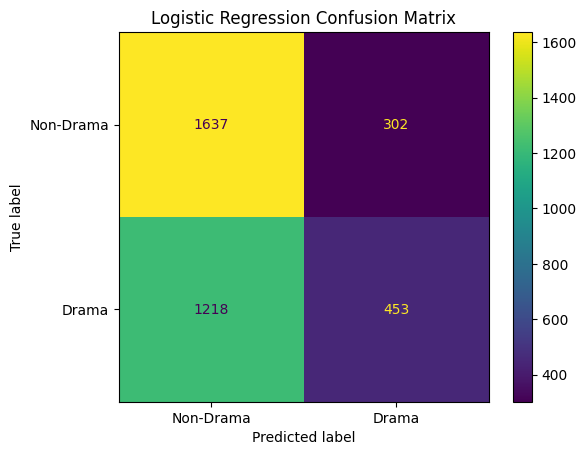

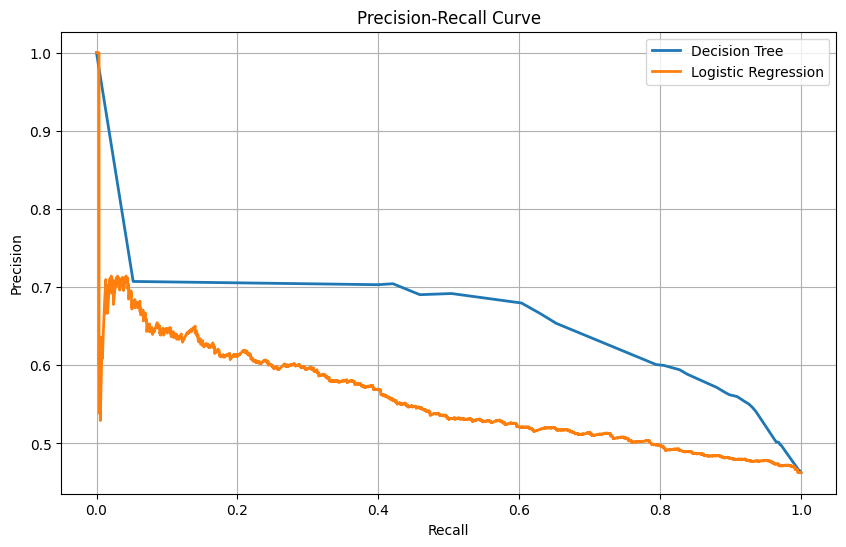

In [9]:
import matplotlib.pyplot as plt

# Compare evaluation metrics
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "Log Loss"],
    "Decision Tree": [dt_results["Accuracy"], dt_results["Precision"], dt_results["Recall"],
                      dt_results["F1-Score"], dt_results["ROC-AUC"], dt_results["Log Loss"]],
    "Logistic Regression": [lr_results["Accuracy"], lr_results["Precision"], lr_results["Recall"],
                             lr_results["F1-Score"], lr_results["ROC-AUC"], lr_results["Log Loss"]]
})

print("Evaluation Metrics Comparison: \n")
print(results, "\n")

# Bar plot for metrics comparison
results.set_index("Metric").plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# Visualize confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, dt_model.predict(X_test), display_labels=["Non-Drama", "Drama"])
plt.title("Decision Tree Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, lr_model.predict(X_test), display_labels=["Non-Drama", "Drama"])
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Ensure probabilities are defined
dt_proba = dt_model.predict_proba(X_test)[:, 1]
lr_proba = lr_model.predict_proba(X_test)[:, 1]

# Visualize Precision-Recall Curve for both models
from sklearn.metrics import precision_recall_curve

# Get precision and recall values for Decision Tree
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_proba)

# Get precision and recall values for Logistic Regression
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_proba)

# Plot the Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(dt_recall, dt_precision, label="Decision Tree", linewidth=2)
plt.plot(lr_recall, lr_precision, label="Logistic Regression", linewidth=2)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


# Results and Insights

### Key Findings:
1. **Decision Tree**:
   - Higher recall and better PR-AUC compared to Logistic Regression.
   - Most important features: IMDb Rating and Number of Votes.
   
2. **Logistic Regression**:
   - Better F1-score, indicating a balance between precision and recall.

### Limitations:
- Imbalanced dataset may favor Non-Drama predictions.
- Additional metadata like runtime could improve predictions.

### Future Work:
- Explore ensemble models like Random Forest or Gradient Boosting.
- Investigate advanced feature engineering techniques.
